<a href="https://colab.research.google.com/github/akshayadik/nlp-capstone/blob/main/AUTOMATIC_TICKET_ASSIGNMENT-akshay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem
Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service.

### 1. Problem interpretation
- Understand the data
- Make an abstract or an overview based on your approach
- Break the problem into smaller tasks
- Discuss among your teammates and share responsibilities

# Abstract

An attempt at Leveraging Machine Learning and Artifical intelligence to automatically classify tickets and assign them to the right owner in a timely manner to save effort, increase user satifaction and improve throughput in the ticketing pipeline of an organization 

### 2. Data analysis and preprocessing: Visual displays are powerful when used well, so think carefully about the information the display.
- Include any insightful visualization
- Share and explain particularly meaningful features, interactions or summary of data
- Display examples to input in your model
- Explain changes to be incorporated into data so that it becomes ready for the model
- Exploring the given Data files
- Understanding the structure of data
- Missing points in data
- Finding inconsistencies in the data
- Visualizing different patterns
- Visualizing different text features
- Dealing with missing values
- Text preprocessing
- Creating word vocabulary from the corpus of report text data
- Creating tokens as required

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Numerical libraries
import numpy as np

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#importing scipy stats 
import scipy
import scipy.stats as st

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Set your project path 
import os
os.chdir('/content/drive/My Drive/Capstone')

In [4]:
ticket_df = pd.read_excel('input_data.xlsx')

Inspect the data

In [5]:
# Check top few records to get a feel of the data structure
ticket_df.head(10)

Short description  ... Assignment group
0                                        login issue  ...            GRP_0
1                                            outlook  ...            GRP_0
2                                 cant log in to vpn  ...            GRP_0
3                      unable to access hr_tool page  ...            GRP_0
4                                       skype error   ...            GRP_0
5     unable to log in to engineering tool and skype  ...            GRP_0
6  event: critical:HostName_221.company.com the v...  ...            GRP_1
7  ticket_no1550391- employment status - new non-...  ...            GRP_0
8               unable to disable add ins on outlook  ...            GRP_0
9                    ticket update on inplant_874773  ...            GRP_0

[10 rows x 4 columns]

In [6]:
print(f'Size of data is {ticket_df.size} and Shape of data is {ticket_df.shape}')

Size of data is 34000 and Shape of data is (8500, 4)


Check the data type

In [7]:
ticket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


Describe the data with summary stats

In [8]:
ticket_df.describe(include='all').T

count unique                top  freq
Short description  8492   7481     password reset    38
Description        8499   7817                the    56
Caller             8500   2950  bpctwhsn kzqsbmtp   810
Assignment group   8500     74              GRP_0  3976

Dataset contains 8500 rows and 4 columns <br>
Short decription and Description column has missing entries <br>
Ticket with **password reset** query has highest frequency of 38 <br>
3976 tickets has assigned to GRP_0 <br>
Description column has **the** words occuring 56 times which looks like incorrect description<br>

# **Missing Value treatment**

In [9]:
#remove NaNs 
ticket_df.isna().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [10]:
ticket_df[pd.isnull(ticket_df).any(axis=1)]

Short description  ... Assignment group
2604                       NaN  ...           GRP_34
3383                       NaN  ...            GRP_0
3906                       NaN  ...            GRP_0
3910                       NaN  ...            GRP_0
3915                       NaN  ...            GRP_0
3921                       NaN  ...            GRP_0
3924                       NaN  ...            GRP_0
4341                       NaN  ...            GRP_0
4395  i am locked out of skype  ...            GRP_0

[9 rows x 4 columns]

In [11]:
ticket_df.fillna(str(), inplace=True)
ticket_df[pd.isnull(ticket_df).any(axis=1)]

Empty DataFrame
Columns: [Short description, Description, Caller, Assignment group]
Index: []

In [12]:
ticket_df.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

Null value is replaced with empty string

In [13]:
# NOT REQUIRED - Akshay
ticket_df.dropna(inplace = True)
ticket_df.isna().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

Verify the Data by Group

In [14]:
ticket_df['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_61       1
GRP_70       1
GRP_67       1
GRP_35       1
GRP_64       1
Name: Assignment group, Length: 74, dtype: int64

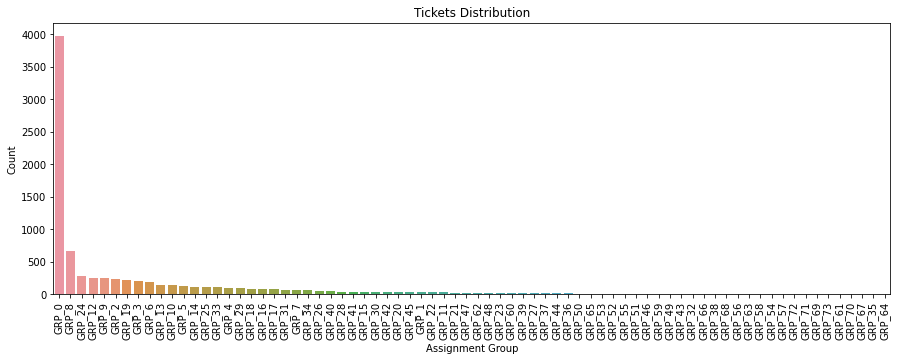

In [15]:
plt.subplots(figsize = (15,5))

sns.countplot(x='Assignment group', data=ticket_df,order = ticket_df['Assignment group'].value_counts().index)
plt.xlabel('Assignment Group') 
plt.ylabel('Count') 
plt.xticks(rotation=90)
plt.title('Tickets Distribution')

plt.show()

Text(0.5, 1.0, 'Distribution of Tickets')

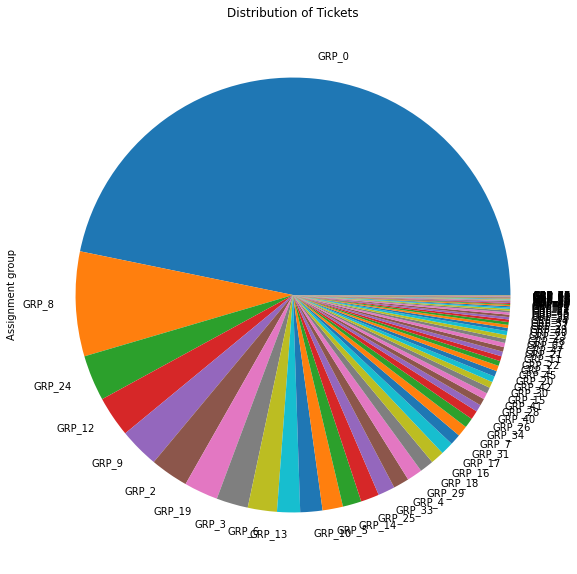

In [16]:
plt.figure(figsize=(10, 10))
ax = ticket_df['Assignment group'].value_counts().plot(kind='pie')
ax.set_title("Distribution of Tickets")

Top 25 Group with highest tickets

In [17]:
 ticket_df['Assignment group'].value_counts().head(25)

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_17      81
GRP_31      69
GRP_7       68
GRP_34      62
GRP_26      56
GRP_40      45
Name: Assignment group, dtype: int64

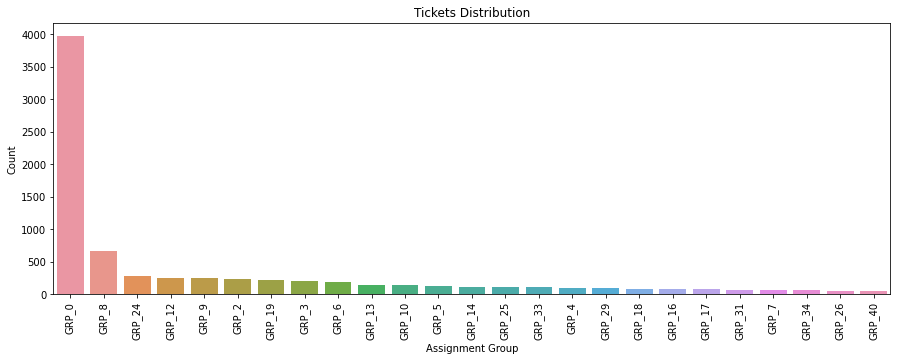

In [18]:
plt.subplots(figsize = (15,5))

sns.countplot(x='Assignment group', data=ticket_df,order = ticket_df['Assignment group'].value_counts().head(25).index)
plt.xlabel('Assignment Group') 
plt.ylabel('Count') 
plt.xticks(rotation=90)
plt.title('Tickets Distribution')

plt.show()

In [19]:
#ticket_df.groupby('Assignment group').apply(lambda x: x[x.count() > 10])

In [20]:
groups = ticket_df['Assignment group'].unique()
print(f'Total group count {len(groups)}')
print(f'Group Details \n {groups}')

Total group count 74
Group Details 
 ['GRP_0' 'GRP_1' 'GRP_3' 'GRP_4' 'GRP_5' 'GRP_6' 'GRP_7' 'GRP_8' 'GRP_9'
 'GRP_10' 'GRP_11' 'GRP_12' 'GRP_13' 'GRP_14' 'GRP_15' 'GRP_16' 'GRP_17'
 'GRP_18' 'GRP_19' 'GRP_2' 'GRP_20' 'GRP_21' 'GRP_22' 'GRP_23' 'GRP_24'
 'GRP_25' 'GRP_26' 'GRP_27' 'GRP_28' 'GRP_29' 'GRP_30' 'GRP_31' 'GRP_33'
 'GRP_34' 'GRP_35' 'GRP_36' 'GRP_37' 'GRP_38' 'GRP_39' 'GRP_40' 'GRP_41'
 'GRP_42' 'GRP_43' 'GRP_44' 'GRP_45' 'GRP_46' 'GRP_47' 'GRP_48' 'GRP_49'
 'GRP_50' 'GRP_51' 'GRP_52' 'GRP_53' 'GRP_54' 'GRP_55' 'GRP_56' 'GRP_57'
 'GRP_58' 'GRP_59' 'GRP_60' 'GRP_61' 'GRP_32' 'GRP_62' 'GRP_63' 'GRP_64'
 'GRP_65' 'GRP_66' 'GRP_67' 'GRP_68' 'GRP_69' 'GRP_70' 'GRP_71' 'GRP_72'
 'GRP_73']


In [21]:
def count_ticket_within_group(ticket_count, ticket_df):
  group_groupby = ticket_df.groupby('Assignment group')
  sample = []
  for group in ticket_df['Assignment group'].unique():
    if group_groupby.get_group(group).shape[0] <= ticket_count:
      sample.append(group)
  return len(sample)

In [22]:
print(f'Total groups having 1 ticket: {count_ticket_within_group(1, ticket_df)}')
print(f'Total groups having 5 or less ticket: {count_ticket_within_group(5, ticket_df)}')
print(f'Total groups having 10 or less ticket: {count_ticket_within_group(10, ticket_df)}')
print(f'Total groups having 15 or less ticket: {count_ticket_within_group(15, ticket_df)}')

Total groups having 1 ticket: 6
Total groups having 5 or less ticket: 19
Total groups having 10 or less ticket: 25
Total groups having 15 or less ticket: 30


In [23]:
group_df = pd.DataFrame(ticket_df['Assignment group'].value_counts())
group_df = group_df.T
group_df

GRP_0  GRP_8  GRP_24  GRP_12  ...  GRP_70  GRP_67  GRP_35  GRP_64
Assignment group   3976    661     289     257  ...       1       1       1       1

[1 rows x 74 columns]

GRP_0 has highest count <br>
Almost 25 groups has less than 10 tickets

In [24]:
ticket_df1 = ticket_df.copy()

In [25]:
ticket_df1.tail(10)

Short description  ... Assignment group
8490                         check status in purchasing  ...           GRP_29
8491                                     vpn for laptop  ...           GRP_34
8492                 hr_tool etime option not visitble   ...            GRP_0
8493           erp fi  - ob09, two accounts to be added  ...           GRP_10
8494  tablet needs reimaged due to multiple issues w...  ...            GRP_3
8495                  emails not coming in from zz mail  ...           GRP_29
8496                           telephony_software issue  ...            GRP_0
8497  vip2: windows password reset for tifpdchb pedx...  ...            GRP_0
8498                     machine nÃ£o estÃ¡ funcionando  ...           GRP_62
8499  an mehreren pc`s lassen sich verschiedene prgr...  ...           GRP_49

[10 rows x 4 columns]

# **Explore Transform Data**

In [26]:
ticket_df_eda = ticket_df.copy()

In [27]:
ticket_df_eda.insert(1, 'sd_len', ticket_df_eda['Short description'].astype(str).apply(len))
ticket_df_eda.insert(2, 'sd_word_count', ticket_df_eda['Short description'].apply(lambda x: len(str(x).split())))
ticket_df_eda.insert(4, 'desc_len', ticket_df_eda['Description'].astype(str).apply(len))
ticket_df_eda.insert(5, 'desc_word_count', ticket_df_eda['Description'].apply(lambda x: len(str(x).split())))
ticket_df_eda.head()

Short description  sd_len  ...             Caller Assignment group
0                    login issue      11  ...  spxjnwir pjlcoqds            GRP_0
1                        outlook       7  ...  hmjdrvpb komuaywn            GRP_0
2             cant log in to vpn      18  ...  eylqgodm ybqkwiam            GRP_0
3  unable to access hr_tool page      29  ...  xbkucsvz gcpydteq            GRP_0
4                   skype error       12  ...  owlgqjme qhcozdfx            GRP_0

[5 rows x 8 columns]

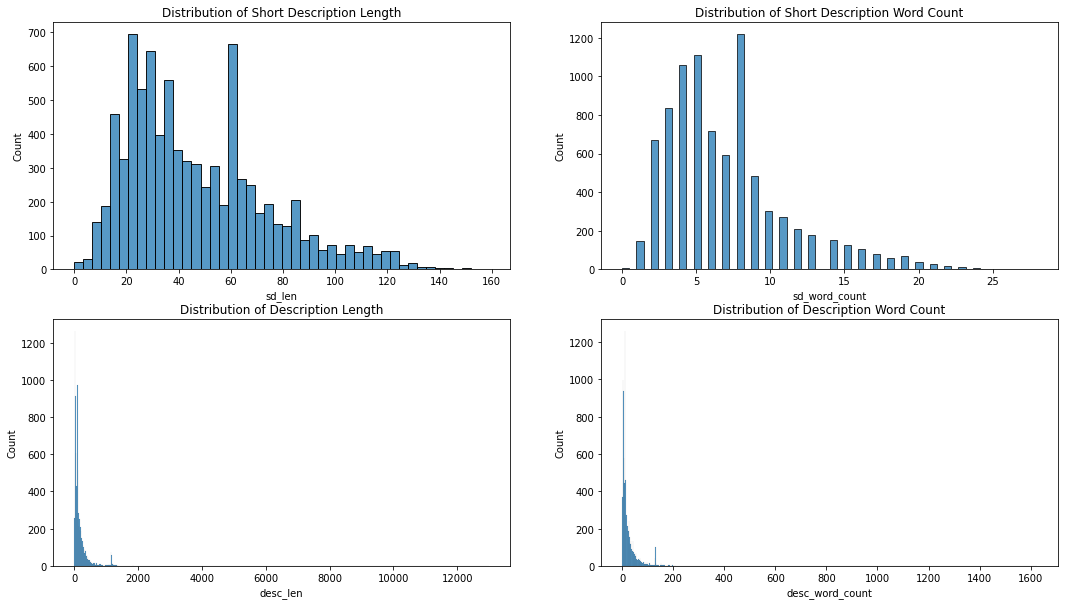

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

axes[0, 0].set_title('Distribution of Short Description Length')
sns.histplot(ticket_df_eda['sd_len'], ax=axes[0, 0])

sns.histplot(ticket_df_eda['sd_word_count'], ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Short Description Word Count')

sns.histplot(ticket_df_eda['desc_len'], ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Description Length')

sns.histplot(ticket_df_eda['desc_word_count'], ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Description Word Count')

plt.show()

**Top Caller**

In [29]:
ticket_df_eda['Caller'].value_counts()

bpctwhsn kzqsbmtp    810
ZkBogxib QsEJzdZO    151
fumkcsji sarmtlhy    134
rbozivdq gmlhrtvp     87
rkupnshb gsmzfojw     71
                    ... 
jgxmafwk mlroijfp      1
zthxyfpn ctsgrafo      1
kizybvpj hisaobfx      1
cudgevmx waqslrbd      1
ybjgecfx nxzuseac      1
Name: Caller, Length: 2950, dtype: int64

In [30]:
ticket_df_eda['Caller'].value_counts().head(10)

bpctwhsn kzqsbmtp    810
ZkBogxib QsEJzdZO    151
fumkcsji sarmtlhy    134
rbozivdq gmlhrtvp     87
rkupnshb gsmzfojw     71
jloygrwh acvztedi     64
spxqmiry zpwgoqju     63
oldrctiu bxurpsyi     57
olckhmvx pcqobjnd     54
dkmcfreg anwmfvlg     51
Name: Caller, dtype: int64

Top caller has recorded 810 tickets

**Top Caller in each Group**

In [31]:
top_n = 5
s = ticket_df_eda['Caller'].groupby(ticket_df_eda['Assignment group']).value_counts()
grp_caller = pd.DataFrame(s.groupby(level=0).nlargest(top_n).reset_index(level=0, drop=True))
grp_caller.head(15)

Caller
Assignment group Caller                   
GRP_0            fumkcsji sarmtlhy     132
                 rbozivdq gmlhrtvp      86
                 olckhmvx pcqobjnd      54
                 efbwiadp dicafxhv      45
                 mfeyouli ndobtzpw      13
GRP_1            bpctwhsn kzqsbmtp       6
                 jloygrwh acvztedi       4
                 jyoqwxhz clhxsoqy       3
                 spxqmiry zpwgoqju       3
                 kbnfxpsy gehxzayq       2
GRP_10           bpctwhsn kzqsbmtp      60
                 ihfkwzjd erbxoyqk       6
                 dizquolf hlykecxa       5
                 gnasmtvx cwxtsvkm       3
                 hlrmufzx qcdzierm       3

In [32]:
# Check if any caller appears to raise ticket for multiple groups
multiple_caller = grp_caller[grp_caller.Caller.duplicated()]
unique_caller = [idx[1] for idx in multiple_caller.index[multiple_caller.Caller.unique()]]
print(f'\033[1mFollowing {len(unique_caller)} callers happen to raise tickets for multiple groups:\033[0m\n')
print(unique_caller)

multiple_caller

Following 15 callers happen to raise tickets for multiple groups:

['hlrmufzx qcdzierm', 'fbgetczn jlsvxura', 'gnasmtvx cwxtsvkm', 'ihfkwzjd erbxoyqk', 'tqfnalpj qyoscnge', 'fmqubnvs kcxpeyiv', 'tghrloks jbgcvlmf', 'jwqyxbzs adpvilqu', 'nuhfwplj ojcwxser', 'oldrctiu bxurpsyi', 'vlymsnej whlqxcst', 'dkmcfreg anwmfvlg', 'bpctwhsn kzqsbmtp', 'spxqmiry zpwgoqju', 'obanjrhg rnafleys']


Caller
Assignment group Caller                   
GRP_1            spxqmiry zpwgoqju       3
GRP_10           ihfkwzjd erbxoyqk       6
                 gnasmtvx cwxtsvkm       3
                 hlrmufzx qcdzierm       3
GRP_11           tghrloks jbgcvlmf       2
...                                    ...
GRP_73           kcnosyae zlpmfxgs       1
GRP_8            ZkBogxib QsEJzdZO      54
GRP_9            ctzykflo evzbhgru       3
                 sholvcmf bjtpomrl       3
                 urhpnlaf agmsfqil       3

[281 rows x 1 columns]

In [33]:
ticket_df.describe(percentiles=[0.1, .25, .5, .75, .95, .99]).transpose()

count unique                top  freq
Short description  8500   7482     password reset    38
Description        8500   7818                the    56
Caller             8500   2950  bpctwhsn kzqsbmtp   810
Assignment group   8500     74              GRP_0  3976

# **Garbled Text Processing**

In [40]:
ticket_df_garbled = ticket_df.copy()

In [41]:
!pip install ftfy

In [42]:
from ftfy import fix_encoding, fix_text, badness

In [43]:
# Write a function to apply to the dataset to detect Mojibakes
def is_garbled(text):
    if not badness.sequence_weirdness(text):
        # nothing weird, should be okay
        return True
    try:
        text.encode('sloppy-windows-1252')
    except UnicodeEncodeError:
        # Not CP-1252 encodable, probably fine
        return True
    else:
        # Encodable as CP-1252, Mojibake alert level high
        return False

In [44]:
ticket_df_garbled[~ticket_df_garbled.iloc[:,:-1].applymap(is_garbled).all(1)]

/usr/local/lib/python3.7/dist-packages/ftfy/badness.py:369: UserWarning: `sequence_weirdness()` is an old heuristic, and the current closest equivalent is `ftfy.badness.badness()`
  "`sequence_weirdness()` is an old heuristic, and the current "


Short description  ... Assignment group
99                             password expiry tomorrow  ...            GRP_0
116                                       server issues  ...            GRP_0
124                            mobile device activation  ...            GRP_0
162                                       access to bex  ...            GRP_0
164          æ’¤å›ž: ticket_no1564867 -- comments added  ...            GRP_0
...                                                 ...  ...              ...
8470  please review your recent ticketing_tool ticke...  ...           GRP_16
8471                           ç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥  ...           GRP_30
8480                      customer group enhanced field  ...            GRP_9
8498                     machine nÃ£o estÃ¡ funcionando  ...           GRP_62
8499  an mehreren pc`s lassen sich verschiedene prgr...  ...           GRP_49

[853 rows x 4 columns]

In [45]:
# Take an example of row# 8471 Short Desc and fix it
print('Grabled text: ', ticket_df_garbled['Short description'][8471])
print('Fixed text: ', fix_text(ticket_df_garbled['Short description'][8471]))

Grabled text:  ç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥
Fixed text:  电脑开机开不出来


In [46]:
ticket_df_garbled['Description'] = ticket_df_garbled['Description'].apply(fix_text)
ticket_df_garbled['Short description'] = ticket_df_garbled['Description'].apply(fix_text)

# **Identify the Languages**

In [47]:
!pip install langdetect

In [48]:
from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 0

def detectLang(value):
    try:
        return detect(value)
    except (Exception):
        return "NotDetected"

In [49]:
ticket_df_garbled['lang'] = ticket_df_garbled['Description'].apply(lambda v: detectLang(v))
ticket_df_garbled['lang'].unique()

array(['en', 'no', 'fr', 'it', 'es', 'af', 'ca', 'sv', 'nl', 'fi', 'de',
       'sl', 'cy', 'id', 'et', 'pt', 'zh-cn', 'pl', 'da', 'ko', 'ro',
       'tl', 'hr', 'sq', 'sw', 'so', 'sk', 'tr', 'vi', 'lt',
       'NotDetected', 'cs', 'lv'], dtype=object)

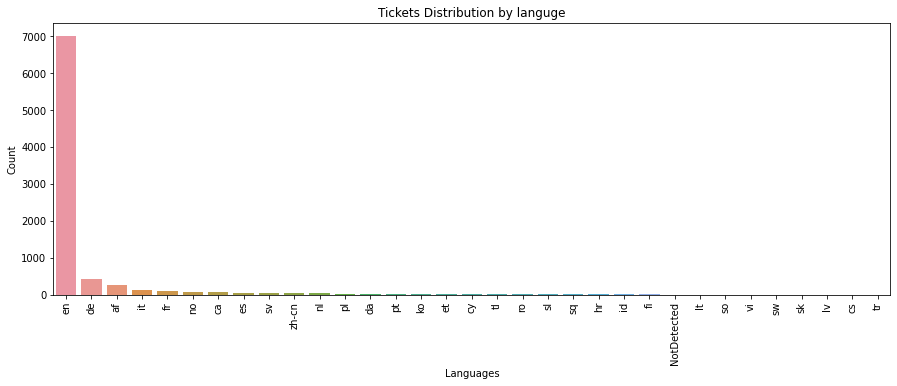

In [50]:
plt.subplots(figsize = (15,5))
sns.countplot(x='lang', data=ticket_df_garbled,order = ticket_df_garbled['lang'].value_counts().index)
plt.xlabel('Languages') 
plt.ylabel('Count') 
plt.xticks(rotation=90)
plt.title('Tickets Distribution by languge')
plt.show()

Since we are dealing with data with multiple languages, we need to perform the language translation

[]

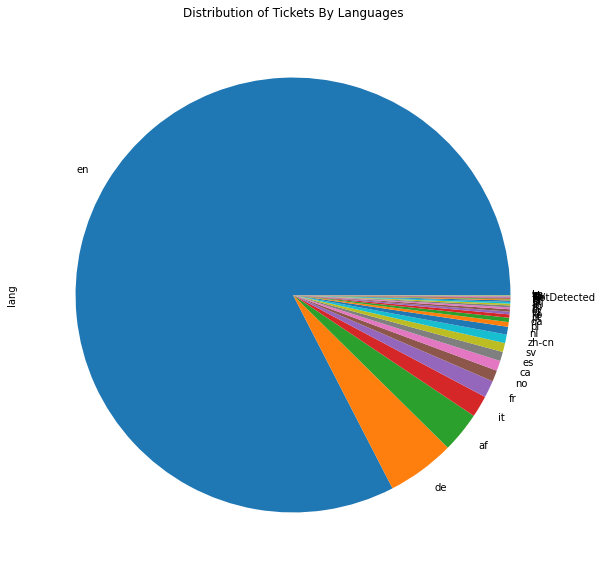

In [51]:
plt.figure(figsize=(10, 10))
ax = ticket_df_garbled['lang'].value_counts().plot(kind='pie')
ax.set_title("Distribution of Tickets By Languages")
plt.plot()

# **Translation**

**Approach 1**

In [52]:
ticket_df_trans = ticket_df_garbled.copy()

In [53]:
!pip install fasttext

In [54]:
!wget -O /tmp/lid.176.bin https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin

--2022-01-21 18:50:04--  https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131266198 (125M) [application/octet-stream]
Saving to: ‘/tmp/lid.176.bin’

/tmp/lid.176.bin    100%[===================>] 125.18M  63.5MB/s    in 2.0s    

2022-01-21 18:50:06 (63.5 MB/s) - ‘/tmp/lid.176.bin’ saved [131266198/131266198]



In [55]:
import re
#This library require the statement in one line, so converting data into single line 
def remove_newline(text):
  text = re.sub(r'\n',' ',text)
  return text
ticket_df_trans['Description'] = ticket_df_trans['Description'].apply(remove_newline)

In [56]:
#Ref :: https://amitness.com/2019/07/identify-text-language-python/

import fasttext

# pretrained model from :: https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin
PRETRAINED_MODEL_PATH = 'lid.176.bin'
lang_detect_model = fasttext.load_model(PRETRAINED_MODEL_PATH)

def predict_lang(sentence):
    detected_lang = lang_detect_model.predict(sentence)[0]
    detected_lang = detected_lang[0].replace('__label__', '')
    return detected_lang;

ticket_df_trans['lang_predict'] = ticket_df_trans['Description'].apply(lambda v: predict_lang(v))
ticket_df_trans.head()

Short description  ... lang_predict
0  -verified user details.(employee# & manager na...  ...           en
1  \n\nreceived from: hmjdrvpb.komuaywn@gmail.com...  ...           en
2  \n\nreceived from: eylqgodm.ybqkwiam@gmail.com...  ...           en
3                      unable to access hr_tool page  ...           en
4                                       skype error   ...           ja

[5 rows x 6 columns]

In [57]:
ticket_df_trans['lang_predict'].unique()

array(['en', 'ja', 'eo', 'ko', 'zh', 'uk', 'de', 'es', 'fi', 'pt', 'hu',
       'fr', 'hr', 'nl', 'lb', 'it', 'pl', 'tr', 'id', 'sv', 'da', 'tt',
       'yue', 'war', 'sl', 'si', 'ru', 'kn'], dtype=object)

In [58]:
ticket_df_trans[ticket_df_trans['lang'] != 'en']

Short description  ... lang_predict
4                                          skype error   ...           ja
14                             unable to open payslips   ...           en
19                              unable to sign into vpn  ...           en
20                             unable to check payslips  ...           en
22                             unable to connect to vpn  ...           en
...                                                 ...  ...          ...
8465         vpn连不上,请转给 贺正平 atcbvglq.bdvmuszt@gmail.com  ...           hu
8471                                   to 小贺,早上电脑开机开不出来  ...           zh
8475               etime- time card update information.  ...           en
8486                  ticket update on ticket_no0427635  ...           en
8499  an mehreren pc`s lassen sich verschiedene prgr...  ...           de

[1482 rows x 6 columns]

In [59]:
!pip install deep-translator

In [60]:
from deep_translator import GoogleTranslator

def translate_lang_en(to_translate, source_lang):
  if source_lang == 'en':
    return to_translate
  try:
    return GoogleTranslator(source=source_lang, target='en').translate(to_translate)
  except:
    return ""

In [61]:
ticket_df_trans['Description_en'] = ticket_df_trans.apply(lambda x: translate_lang_en(x.Description, x.lang_predict), axis=1)

In [62]:
ticket_df_trans['short_description_en'] = ticket_df_trans.apply(lambda x: translate_lang_en(x['Short description'], x.lang_predict), axis=1)

In [63]:
ticket_df_trans[ticket_df_trans['lang_predict'] != 'en'].head(10)

Short description  ...                               short_description_en
4                                         skype error   ...                                        skype error
39                          call for ecwtrjnq jpecxuty  ...                         call for ecwtrjnq jpecxuty
51                          call for ecwtrjnq jpecxuty  ...                         call for ecwtrjnq jpecxuty
126                                   blank call //gso  ...                                   blank call //gso
164  \n\nreceived from: abcdri@company.com\n\nwindy...  ...                                                   
213                                  loud noise // gso  ...                                  loud noise // gso
222          support für fa.konnica \arexjftu ohxdwngl  ...          support for fa.konnica \arexjftu ohxdwngl
223  hallo ,\n\nes ist erneut passiert. der pc hat ...  ...  Hi there ,\n\nit happened again. the pc hung u...
229                         call for ecwtrjnq jpecxuty  ...                         call for ecwtrjnq jpecxuty
251  bitte passwort für fygrwuna gomcekzi e-mail zu...  ...  please reset password for fygrwuna gomcekzi em...

[10 rows x 8 columns]

**Approach 2**

In [64]:
!pip install google_trans_new

In [65]:
from langdetect import detect
from google_trans_new import google_translator  

#simple function to detect and translate text 
def detect_and_translate(text,target_lang):
    
    if target_lang == 'en':
      return text
    try:
      result_lang = detect(text)
    except:
      print(f'Error in detection: {text}')
      return text
    
    if result_lang == target_lang:
        return text    
    else:
        translator = google_translator()
        translate_text = translator.translate(text,lang_src=result_lang,lang_tgt=target_lang)
        return translate_text 

In [66]:
ticket_df_trans['Description_en_1'] = ticket_df_trans.apply(lambda x: detect_and_translate(x.Description, x.lang), axis=1)

Error in detection: 
Error in detection: +86  
Error in detection:    
Error in detection:  


In [67]:
ticket_df_trans['short_description_en_1'] = ticket_df_trans.apply(lambda x: translate_lang_en(x['Short description'], x.lang_predict), axis=1)

In [68]:
ticket_df_trans[ticket_df_trans['lang_predict'] != 'en'].head(5)

Short description  ...      short_description_en_1
4                                         skype error   ...                 skype error
39                          call for ecwtrjnq jpecxuty  ...  call for ecwtrjnq jpecxuty
51                          call for ecwtrjnq jpecxuty  ...  call for ecwtrjnq jpecxuty
126                                   blank call //gso  ...            blank call //gso
164  \n\nreceived from: abcdri@company.com\n\nwindy...  ...                            

[5 rows x 10 columns]

**Approach 3** <br>
There is limit to convert the word so this is not being used

In [69]:
# Define and construct the service urls
svc_domains = ['.com','.com.au','.com.ar','.co.kr','.co.in','.co.jp','.at','.de','.ru','.ch','.fr','.es','.ae']
svc_urls = ['http://translate.google' + domain for domain in svc_domains]

In [70]:
# List of column data to consider for translation
#trans_cols = ['Short description','Description']

# Add a new column to store the detected language
#ticket_df.insert(loc=2, column='Language', value=np.nan, allow_duplicates=True)

#for idx in range(ticket_df.shape[0]):
    # Instantiate Goslate class in each iteration
#    gs = Goslate(service_urls=svc_urls)
#    lang = gs.detect(' '.join(ticket_df.loc[idx, trans_cols].tolist()))
#    row_iter = gs.translate(ticket_df.loc[idx, trans_cols].tolist(), 
#                            target_language='en', 
#                            source_language='auto')
#    ticket_df.loc[idx, trans_cols] = list(row_iter)
    
#ticket_df.Language = lang
#ticket_df.head()

# **Text Preprocessing**

In [71]:
ticket_df_processing = ticket_df_trans.copy()

In [72]:
from dateutil import parser
import re
import string

def lower_case(text):
  return text.lower()
def is_valid_date(date_str):
    try:
        parser.parse(date_str)
        return True
    except:
        return False
def remove_email(text):
  text = re.sub(r'\S*@\S*\s?', '', text)
  return text
def remove_number(text):
  text = re.sub(r'\d+','' ,text)
  return text
def remove_newline(text):
  text = re.sub(r'\n',' ',text)
  return text
def remove_special(text):
  text = re.sub(r'#','', text)
  text = text.translate(str.maketrans('', '', string.punctuation))
  text = re.sub(r'\s+', ' ', text)
  return text
def remove_hyperlink(text):
  text = re.sub(r'https?:\/\/.*\/\w*', '', text)
  return text
def extract_email(text):
  email_dict = get_email(text)
  for key in email_dict.keys():
    text = text.replace(email_dict[key], key)
  return text, email_dict
def add_email(text, email_dict):
  for key in email_dict.keys():
    text = text.replace(key, email_dict[key])
  return text
def get_email(text):
    # Replaces the email addresses with custom key word and 
    # save them into a dictionary for future use
    EMAIL_PATTERN = r"([\w.+-]+@[a-z\d-]+\.[a-z\d.-]+)"
    unique_emailid = set(re.findall(EMAIL_PATTERN, text))
    email_replacement = dict()
    for idx, email in enumerate(unique_emailid):
        email_replacement[f'RetainedEmailId{idx}'] = email
    return email_replacement
def clean_text(text):
  text = lower_case(text)
  text, email_dict = extract_email(text)
  text = ' '.join([w for w in text.split() if not is_valid_date(w)])
  #text = remove_email(text)
  text = remove_newline(text)
  text = remove_special(text)
  text = remove_hyperlink(text)
  text = add_email(text, email_dict)
  text = remove_number(text)
  return text.strip()

In [73]:
print(ticket_df_processing['Description'][32])

  received from: kxsceyzo.naokumlb@gmail.com  gentles,  i have two devices that are trying to share an ip address. they are trying to share 96.26.27.9619. one is a printer with the hostname of prtjc0074, and the other is a new display for erp. the display is using dhcp to get its address assigned and the printer is hard coded.  my guess is that the address 96.26.27.9619 did not get set to a static address in dhcp. i need this corrected so the display will pick up another address.  


In [74]:
ticket_df_processing['Description'] = ticket_df_processing['Description'].apply(clean_text)
ticket_df_processing['Description_en'] = ticket_df_processing['Description_en'].apply(clean_text)
ticket_df_processing['Description_en_1'] = ticket_df_processing['Description_en_1'].apply(clean_text)

In [75]:
ticket_df_processing['Short description'] =  ticket_df_processing['Short description'].apply(clean_text)
ticket_df_processing['short_description_en'] =  ticket_df_processing['short_description_en'].apply(clean_text)
ticket_df_processing['short_description_en_1'] =  ticket_df_processing['short_description_en_1'].apply(clean_text)

In [76]:
print(ticket_df_processing['Description_en_1'][32])

received from kxsceyzo.naokumlb@gmail.com gentles i have two devices that are trying to share an ip address they are trying to share  one is a printer with the hostname of prtjc and the other is a new display for erp the display is using dhcp to get its address assigned and the printer is hard coded my guess is that the address  did not get set to a static address in dhcp i need this corrected so the display will pick up another address


We have performed the data clearning activity

# ***Stemming & Lemmatization***

In [77]:
ticket_df_slt = ticket_df_processing.copy()

In [78]:
!pip install spacy

**Combine Description and Short Description**

Approach 1 has given better translation, so we will use the same columm for further processing

In [79]:
ticket_df_slt['combine_description']=ticket_df_slt['short_description_en'].astype(str) + ' ' +ticket_df_slt['Description_en'].astype(str)

In [80]:
ticket_df_slt[ticket_df_slt['lang'] != 'en'].tail(10)

Short description  ...                                combine_description
8429                                  new email problem  ...                new email problem new email problem
8439   der drucker steht am platz von wckrxovs aunsgzmd  ...  the printer is in the place of wckrxovs aunsgz...
8451                             password reset erp sid  ...      password reset erp sid password reset erp sid
8457                             显示java插件无法加载所需版本或更高版本。  ...                                                   
8461  reboot lhqsm patent web uacyltoe hxgaycze serv...  ...  reboot lhqsm patent web uacyltoe hxgaycze serv...
8465          vpn连不上请转给 贺正平 atcbvglq.bdvmuszt@gmail.com  ...  vpn 连不上 请 转给 贺正平 atcbvglq.bdvmuszt@gmail.com v...
8471                                    to 小贺早上电脑开机开不出来  ...                                                   
8475                 etime time card update information  ...  etime time card update information etime time ...
8486                          ticket update on ticketno  ...  ticket update on ticketno ticket update on tic...
8499  an mehreren pcs lassen sich verschiedene prgra...  ...  different programs cannot be opened on several...

[10 rows x 11 columns]

In [81]:
ticket_df_slt.iloc[8499]['combine_description']

'different programs cannot be opened on several pcs area cnc different programs cannot be opened on several pcs area cnc'

In [82]:
import spacy
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') 

stopwords_eng = stopwords.words('english')
for i,text in enumerate(ticket_df_slt['combine_description']):
  ticket_df_slt['combine_description'][i]=" ".join(word for word in text.split(' ') if word not in stopwords_eng)
 

nlp = spacy.load('en', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [83]:
ticket_df_slt['combine_description'] = ticket_df_slt['combine_description'].apply(lemmatize_text)

In [84]:
ticket_df_slt['combine_description'][8499]

'different program can not open several pc area cnc different program can not open several pc area cnc'

# **NGram**

In [85]:
ticket_df_ngram = ticket_df_slt.copy()

In [86]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [87]:
def get_top_n_ngrams(corpus, top_n=None, ngram_range=(1,1), stopwords=None):
    vec = CountVectorizer(ngram_range=ngram_range, 
                          stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_n]

In [88]:
ticket_df_ngram

Short description  ...                                combine_description
0     verified user detailsemployee manager name che...  ...  verify user detailsemployee manager name check...
1     received from hmjdrvpb.komuaywn@gmail.com hell...  ...  receive hmjdrvpb.komuaywn@gmail.com hello team...
2     received from eylqgodm.ybqkwiam@gmail.com hi i...  ...  receive eylqgodm.ybqkwiam@gmail.com hi can not...
3                          unable to access hrtool page  ...  unable access hrtool page unable access hrtool...
4                                           skype error  ...                            skype error skype error
...                                                 ...  ...                                                ...
8495  received from avglmrts.vhqmtiua@gmail.com good...  ...  receive avglmrts.vhqmtiua@gmail.com good after...
8496                            telephonysoftware issue  ...    telephonysoftware issue telephonysoftware issue
8497   vip windows password reset for tifpdchb pedxruyf  ...  vip windows password reset tifpdchb pedxruyf v...
8498  i am unable to access the machine utilities to...  ...  unable access machine utility finish drawer ad...
8499  an mehreren pcs lassen sich verschiedene prgra...  ...  different program can not open several pc area...

[8500 rows x 11 columns]

In [89]:
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') 

stopword_eng = stopwords.words('english')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


**Unigrams**

In [90]:
top_n = 50
ngram_range = (1,1)
uni_grams = get_top_n_ngrams(ticket_df_ngram.combine_description, top_n, ngram_range, stopwords=stopword_eng)

unigram_df = pd.DataFrame(uni_grams, columns = ['words' , 'count'])
uni_top = unigram_df.head(10)
uni_top.head()

words  count
0      com   6205
1  receive   5015
2    gmail   4280
3   please   4172
4  company   3976

**BiGram**

In [91]:
top_n = 50
bigram_range = (2,2)
bi_grams = get_top_n_ngrams(ticket_df_ngram.combine_description, top_n, bigram_range, stopwords=stopword_eng)

bigram_df = pd.DataFrame(bi_grams, columns = ['words' , 'count'])
bi_top = bigram_df.head(10)
bi_top.head()

words  count
0                gmail com   3879
1              company com   2234
2  receive monitoring_tool   1922
3  monitoring_tool company   1922
4        fail jobscheduler   1618

**TriGram**

In [92]:
top_n = 50
trigram_range = (3,3)
tri_grams = get_top_n_ngrams(ticket_df_ngram.combine_description, top_n, trigram_range, stopwords=stopword_eng)

trigram_df = pd.DataFrame(tri_grams, columns = ['words' , 'count'])
tri_top = trigram_df.head(10)
tri_top.head()

words  count
0  receive monitoring_tool company   1922
1      monitoring_tool company com   1922
2                  company com job   1570
3                     job job fail    884
4            job fail jobscheduler    884

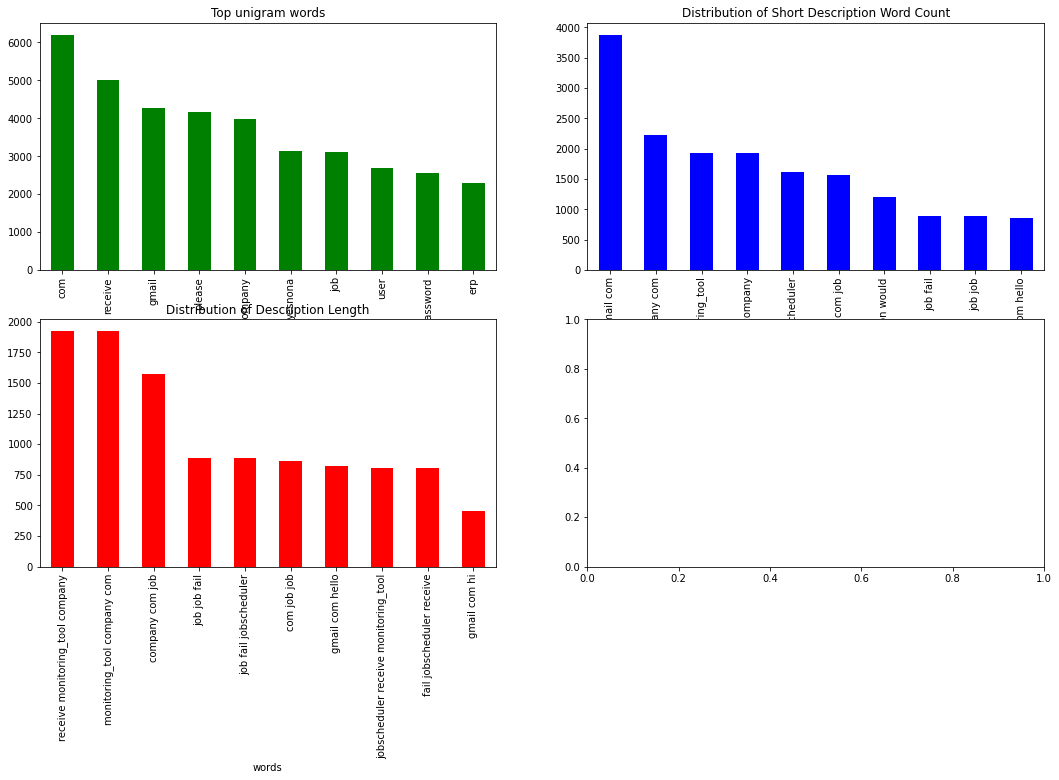

In [93]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

axes[0, 0].set_title('Top unigram words')
#sns.histplot(ticket_df_eda['sd_len'], ax=axes[0, 0])
uni_top.groupby('words').sum()['count'].sort_values(ascending=False).plot(kind='bar',color='green', ax=axes[0, 0])

bi_top.groupby('words').sum()['count'].sort_values(ascending=False).plot(kind='bar',color='blue', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Short Description Word Count')

tri_top.groupby('words').sum()['count'].sort_values(ascending=False).plot(kind='bar',color='red', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Description Length')

plt.show()

# **WordCloud**

In [94]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def generate_word_clod(corpus):
    # mask = np.array(Image.open('cloud2.png'))
    # Instantiate the wordcloud object
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords=stopword_eng,
                    # mask=mask,
                    min_font_size = 5).generate(corpus)

    # plot the WordCloud image                        
    plt.figure(figsize = (12, 12), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

**Unigram WordCloud**

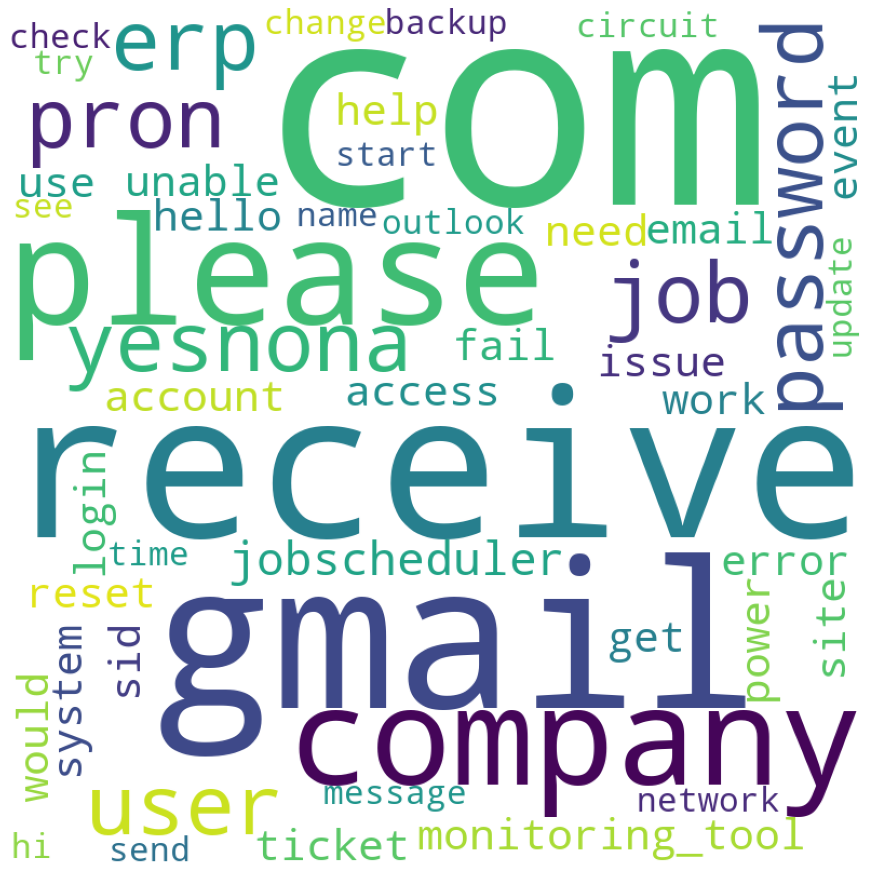

In [95]:
generate_word_clod(' '.join(unigram_df.words.str.strip()))

**Bigram WordCloud**

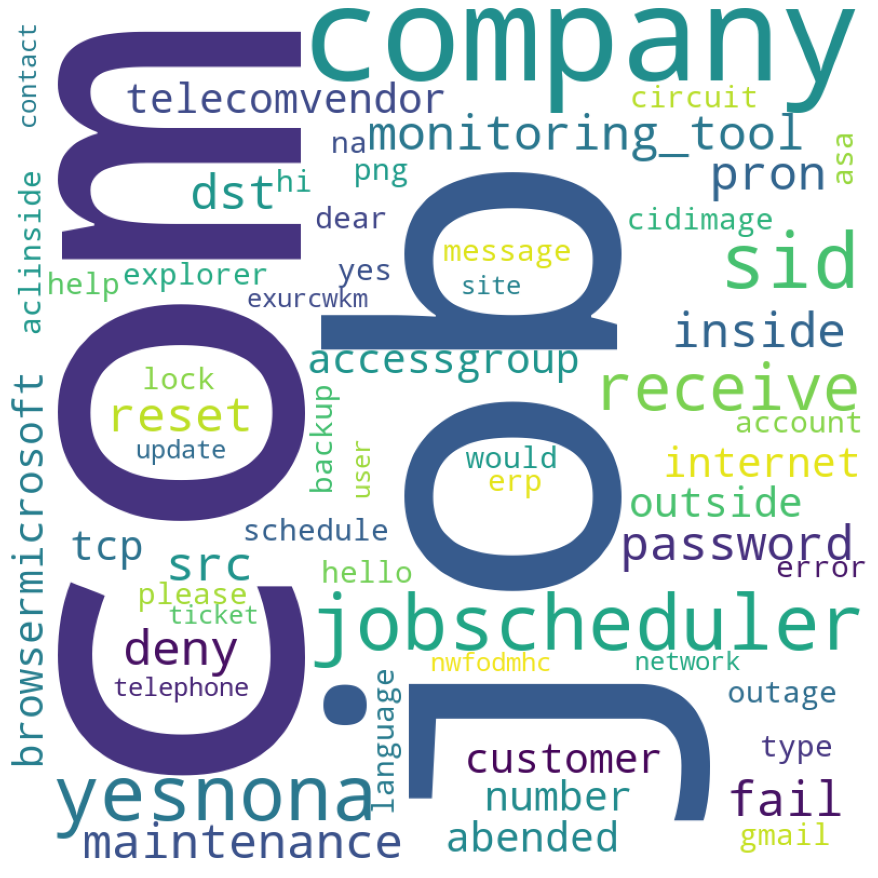

In [96]:
generate_word_clod(' '.join(bigram_df.words.str.strip()))

**TriGram WordCloud**

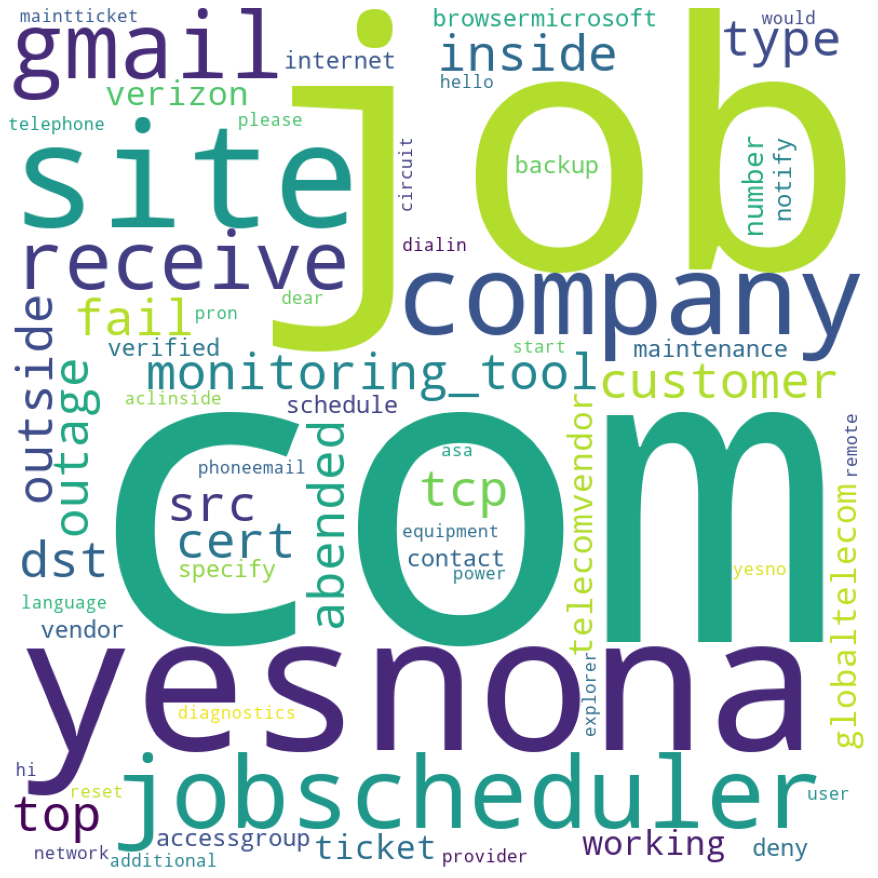

In [97]:
generate_word_clod(' '.join(trigram_df.words.str.strip()))

**Group 0 WordCloud**

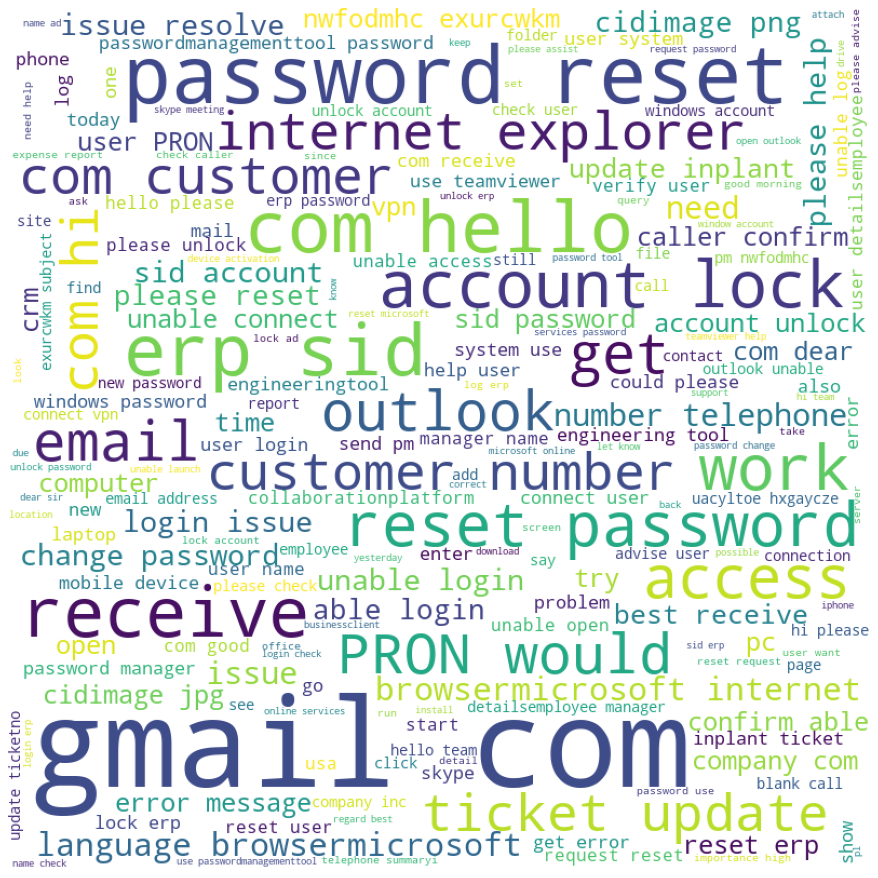

In [98]:
generate_word_clod(' '.join(ticket_df_ngram[ticket_df_ngram['Assignment group'] == 'GRP_0'].combine_description.str.strip()))

***Short Decription WordCloud***

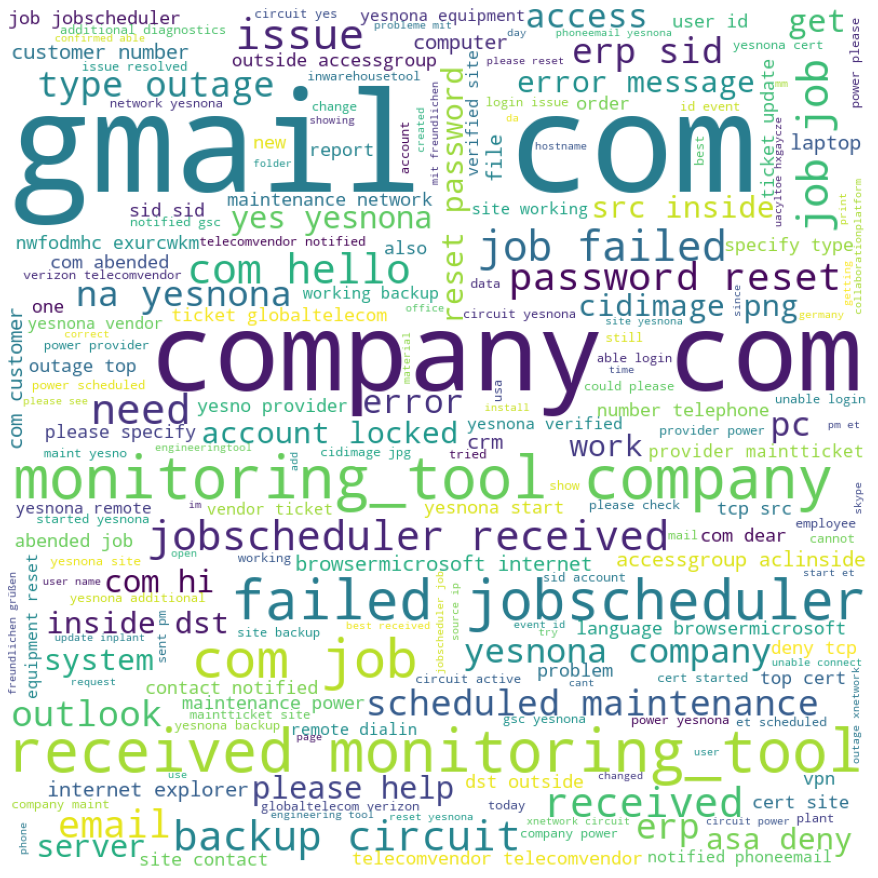

In [99]:
# Generate wordcloud for ticket Short description
generate_word_clod(' '.join(ticket_df_ngram['Short description'].str.strip()))

**Description WordCloud**

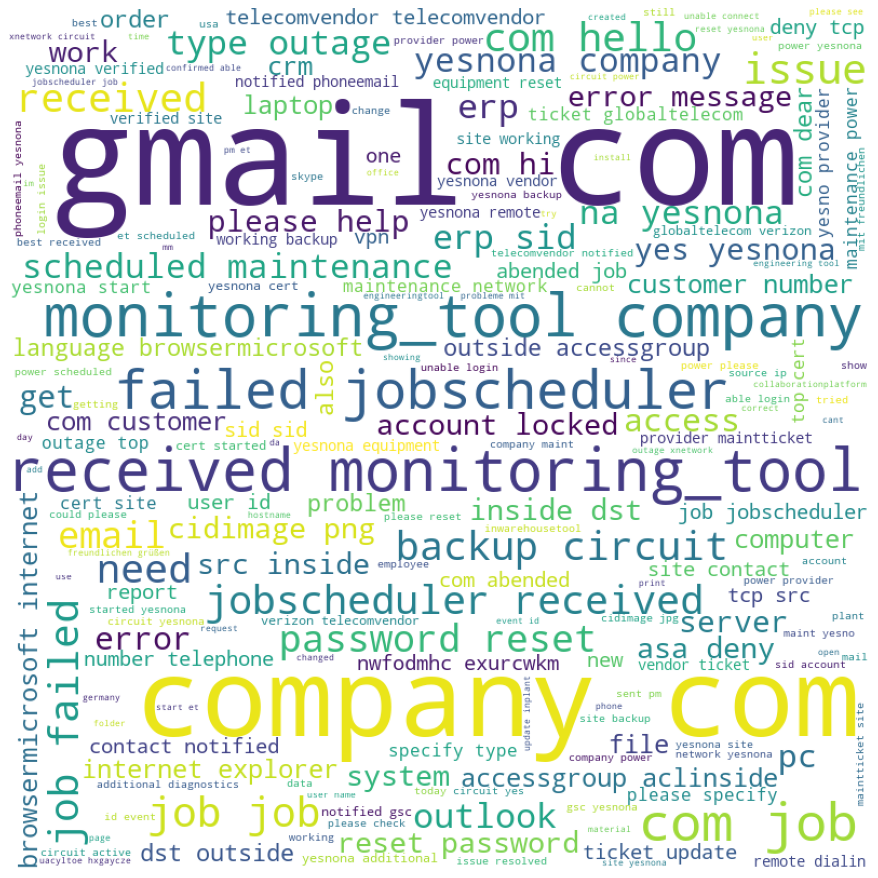

In [100]:
generate_word_clod(' '.join(ticket_df_ngram.Description.str.strip()))

**Short Description and Description, Combine Word Cloud**

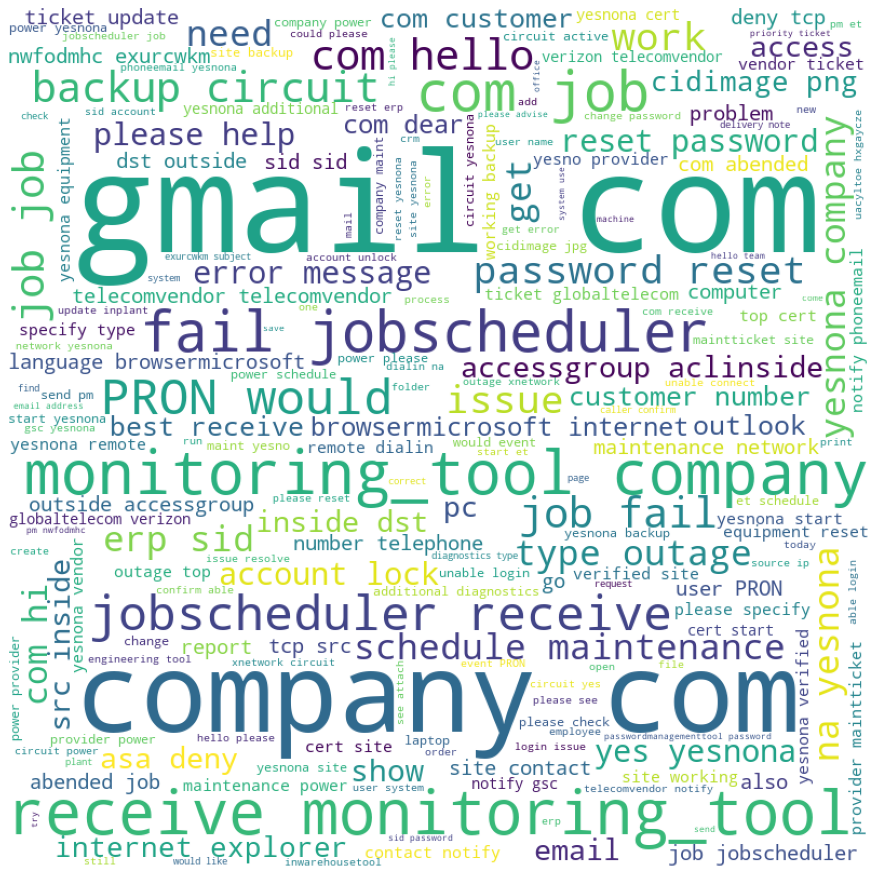

In [101]:
# Generate wordcloud for ticket Summary
generate_word_clod(' '.join(ticket_df_ngram.combine_description.str.strip()))

In [102]:
ticket_df_ngram.describe()

Short description  ...                                combine_description
count                                                8500  ...                                               8500
unique                                               6716  ...                                               6537
top     received from monitoring_tool@company.com job ...  ...  receive monitoring_tool@company.com job job fa...
freq                                                  430  ...                                                430

[4 rows x 11 columns]

**Word count by bin**

In [110]:
ticket_df_count = ticket_df_eda.copy()

In [112]:
data = pd.DataFrame()
bins=[0,50,75, np.inf]
data['bins']=pd.cut(ticket_df_count.sd_word_count, bins=[0,100,300,500,800, np.inf], labels=['0-100', '100-300', '300-500','500-800' ,'>800'])
word_distribution = data.groupby('bins').size().reset_index().rename(columns={0:'counts'})
word_distribution

bins  counts
0    0-100    8492
1  100-300       0
2  300-500       0
3  500-800       0
4     >800       0

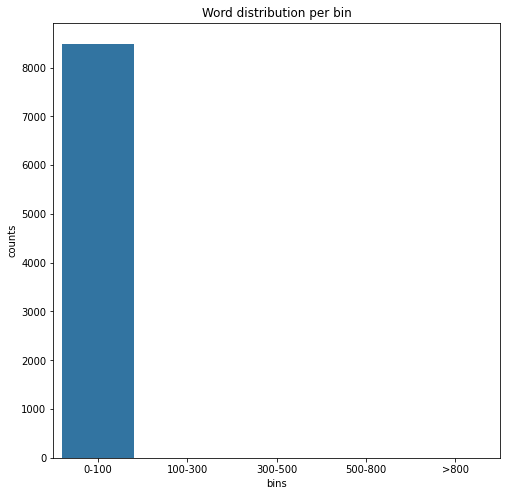

In [113]:
plt.figure(figsize=(8, 8))
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")
plt.show()

# **Label Encoding**

In [114]:
ticket_df_resample = ticket_df_ngram.copy()

In [115]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
dataframe= label_encoder.fit_transform(ticket_df_resample['Assignment group'])
grp_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

In [116]:
dataframe

array([ 0,  0,  0, ...,  0, 59, 44])

# **Handle Imbalance Data**

We can use multiple strategies, here we are using resample class from sklearn

In [117]:
from sklearn.utils import resample
max = ticket_df_resample['Assignment group'].value_counts().max()

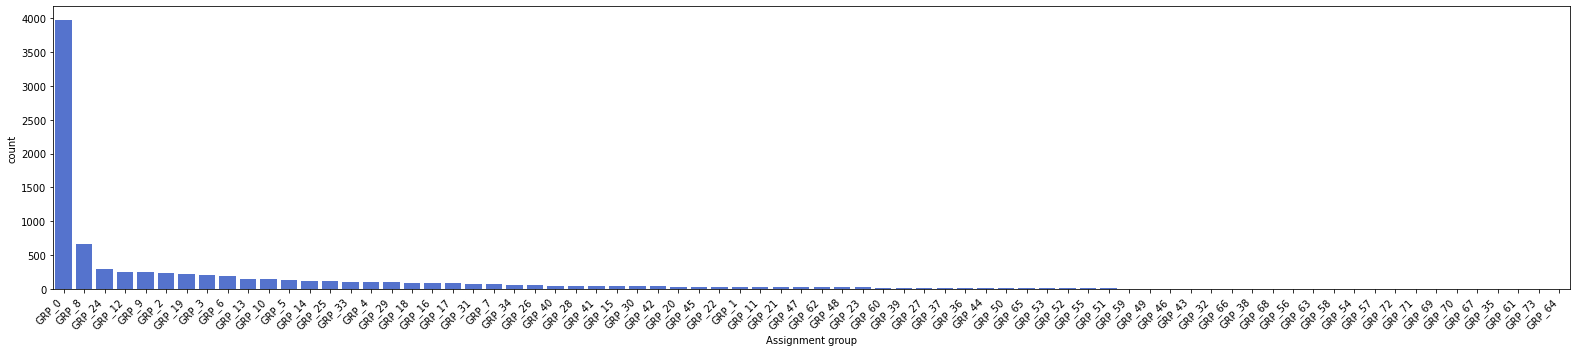

In [118]:
descending_order = ticket_df_resample['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=ticket_df_resample, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

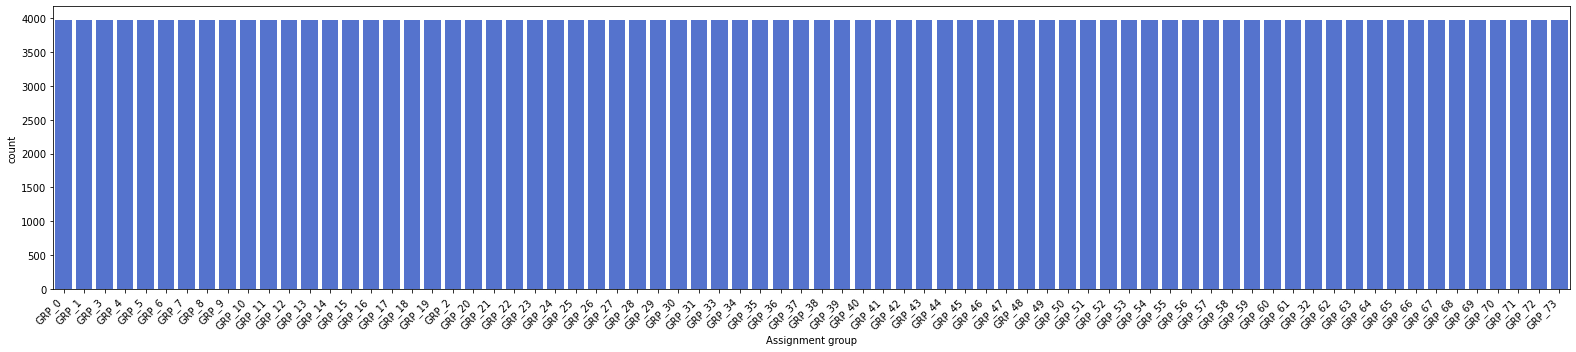

In [119]:
ticket_df_resample_after = ticket_df_resample[0:0]
for grp in ticket_df_resample['Assignment group'].unique():
    ticket_df_grp = ticket_df_resample[ticket_df_resample['Assignment group'] == grp]
    resampled = resample(ticket_df_grp, replace=True, n_samples=max, random_state=123)
    ticket_df_resample_after = ticket_df_resample_after.append(resampled)


descending_order = ticket_df_resample_after['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=ticket_df_resample_after, color='royalblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

# **Models**

In [123]:
ticket_data_df = ticket_df_resample_after.copy()

**Delete unwanted columns**

In [124]:
ticket_data_df = ticket_data_df.drop(['Short description', 'Description', 'Caller', 'lang', 'lang_predict', 'Description_en_1', 'short_description_en_1','Description_en', 'short_description_en'],axis=1)

In [125]:
ticket_data_df.head(10)

Assignment group                                combine_description
7579            GRP_0  receive przndfbo.pldqbhtn@gmail.com please kin...
7323            GRP_0  login issue verify user detailsemployee manage...
7357            GRP_0    summarysound working pc summarysound working pc
2790            GRP_0  windows password reset request windows passwor...
2327            GRP_0        ticket update inplant ticket update inplant
3662            GRP_0  need add two mailbox outlook still work outloo...
6557            GRP_0  receive oqvwgnkc.gkjylpzx@gmail.com hello need...
7813            GRP_0          password reset alert password reset alert
4552            GRP_0  german call caller disconnect german call call...
2369            GRP_0  windows acccount lockout windows acccount lockout

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import roc_curve, accuracy_score, precision_recall_curve
from sklearn.feature_extraction.text import CountVectorizer

In [133]:
def model_pocess(model, X_train, X_test, y_train, y_test):
  model_process = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('model', model),
                     ])
  model_process.fit(X_train, y_train)
  # predict from the claffier
  y_pred = model_process.predict(X_test)
  y_train_pred = model_process.predict(X_train)
  print('Model:', model_process)
  print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
  print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
  print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred)))

In [130]:
# Create training and test datasets with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(ticket_data_df.combine_description, 
                                                    ticket_data_df['Assignment group'], 
                                                    test_size=0.20, 
                                                    random_state=42)

**Machine Learning Model**

In [134]:
model_pocess(MultinomialNB(), X_train, X_test, y_train, y_test)


Model: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', MultinomialNB())])
Training accuracy: 88.83%
Testing accuracy: 88.60%
Confusion matrix:
 [[346   1   6 ...   3   0   0]
 [  0 625   0 ...   0   0   0]
 [  0   0 614 ...   0   0  13]
 ...
 [  0   0   0 ... 784   0   0]
 [  0   0   5 ...   0 390  39]
 [  0   0   0 ...   0   0 354]]


In [135]:
model_pocess(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

Model: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', DecisionTreeClassifier())])
Training accuracy: 93.51%
Testing accuracy: 93.18%
Confusion matrix:
 [[615   0   0 ...   0   1   1]
 [  0 777   0 ...   0   0   0]
 [  0   0 670 ...   0   0 109]
 ...
 [  0   0   0 ... 784   0   0]
 [  0  11   5 ...   0 476 209]
 [  0   0   0 ...   0   0 688]]


**Neural network model**

In [152]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [173]:
# Function to build Deep NN
def Build_Model_DNN_Text(shape, nClasses, dropout=0.3):
    """
    buildModel_DNN_Tex(shape, nClasses,dropout)
    Build Deep neural networks Model for text classification
    Shape is input feature space
    nClasses is number of classes
    """
    model = Sequential()
    node = 512 # number of nodes
    nLayers = 4 # number of  hidden layer
    model.add(Dense(node,input_dim=shape,activation='relu'))
    model.add(Dropout(dropout))
    for i in range(0,nLayers):
        model.add(Dense(node,input_dim=node,activation='relu'))
        model.add(Dropout(dropout))
        model.add(BatchNormalization())
    model.add(Dense(nClasses, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    print(model.summary())
    return model

In [174]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(ticket_data_df.combine_description)
X_train_vec = Tfidf_vect.transform(X_train)
X_test_vec = Tfidf_vect.transform(X_test)

# Instantiate the network
model_DNN = Build_Model_DNN_Text(X_train_vec.shape[1], 75)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 512)               2560512   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_66 (Dense)            (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 batch_normalization_65 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_67 (Dense)            (None, 512)               262656    
                                                     

In [188]:
def call_backs(name):
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=100)
    return [early_stopping]

In [189]:
model_DNN.fit(X_train_vec, y_train,
                              validation_data=(X_test_vec, y_test),
                              callbacks=call_backs("NN"),
                              epochs=10,
                              batch_size=128,
                              verbose=2)

Epoch 1/10


UnimplementedError: ignored

In [137]:
def plot_loss(loss_train, loss_val, epochs):
  #loss_train = history.history['loss']
  #loss_val = history.history['val_loss']
  #epochs = range(0, EPOCH_COUNT)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='Validation loss')
  plt.title('Training and Validation loss Vs Epoch')
  plt.xlabel('Epochs')
  plt.ylabel('Training and Validation Loss')
  plt.legend()
  plt.show()

In [182]:
BATCH_SIZE = 500
def reg_model(shape, hidden_act='relu', dropout=False):
  hidden_nodes = 512
  output_nodes = 75
  layers = 4

  model = Sequential()
  model.add(Dense(hidden_nodes,input_dim=shape,activation='relu'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))

  for i in range(0, layers):
    model.add(Dense(hidden_nodes,input_dim=shape,activation='relu'))
    model.add(BatchNormalization(input_shape=(11,)))
    model.add(Activation('relu'))
    if dropout:
      model.add(Dropout(0.2))

  model.add(Dense(output_nodes, kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Activation("softmax"))

  model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
  print(model.summary())
  return model

In [155]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(ticket_data_df.combine_description)
X_train_vec = Tfidf_vect.transform(X_train)
X_test_vec = Tfidf_vect.transform(X_test)

In [183]:
model = reg_model(X_train_vec.shape[1])

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 512)               2560512   
                                                                 
 batch_normalization_71 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 activation_67 (Activation)  (None, 512)               0         
                                                                 
 dense_74 (Dense)            (None, 512)               262656    
                                                                 
 batch_normalization_72 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 activation_68 (Activation)  (None, 512)             

In [186]:
model.fit(X_train_vec, y_train,
                              validation_data=(X_test_vec, y_test),
                              epochs=10,
                              batch_size=128,
                              verbose=2)

predicted = model.predict(X_test_vec)
print(f'Prediction: {predicted}')

Epoch 1/10


UnimplementedError: ignored